# Лабораторна робота № 3
## Структури даних: масиви, зв’язні списки
### 2 варіант
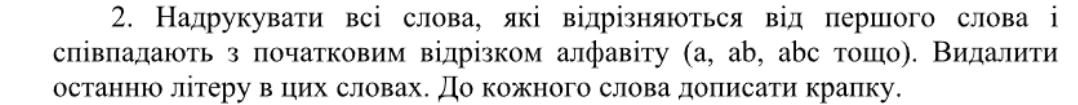

In [86]:
import time
import sys

### Реалізація використовуючи масив

In [87]:
def result_with_list(words):
    
    if not words:  
        print("Enter the data")
        return [], 0, 0
    
    start_time = time.perf_counter()  
    
    first_word = words[0] 
    result = [] 
    
    for word in words[1:]:
      
        if word != first_word and not (word.startswith("a") or word.startswith("ab") or word.startswith("abc")):
            new_word = word[:-1] + "."
            result.append(new_word) 
            
    end_time = time.perf_counter() 
    words = ' '.join(result)
    total_time = end_time - start_time
        
    return words, total_time, sys.getsizeof(result) 

### Реалізація використовуючи двозвязний список

In [88]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
                
# Перевірити можливість вставки елемента в початок, в кінець і в середину списку;
    def append_end(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node

    def append_beginning(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = self.tail = new_node
        else:
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node

    def append_middle(self, prev_node, data):
        if not prev_node:
            return
        new_node = Node(data)
        new_node.next = prev_node.next
        new_node.prev = prev_node
        if prev_node.next:
            prev_node.next.prev = new_node
        prev_node.next = new_node
        if new_node.next is None:
            self.tail = new_node
    
    # Проконтролювати правильність видалення елемента з кінця, середини, початку списку;
    # Відстежити видалення єдиного елемента і видалення елемента з порожнього списку;
    def delete(self, data):
        
        if self.head is None:
            return  

        current = self.head
        while current:
            if current.data == data:
             
                if self.head == self.tail:
                    self.head = self.tail = None  
                    
                elif current == self.head:
                    self.head = current.next
                    self.head.prev = None 
           
                elif current == self.tail:
                    self.tail = current.prev
                    if self.tail:
                        self.tail.next = None 
                        
                else:
                    current.prev.next = current.next
                    current.next.prev = current.prev
                        
                return
            
            current = current.next    
    
    
    def process(self):
        
        if not self.head:
            return "", 0, 0  
        
        start_time = time.perf_counter() 
        
        first_word = self.head.data 
        current = self.head.next
        result = []
        
        while current:  
            if current.data != first_word and not (current.data.startswith("a") or 
                                                   current.data.startswith("ab") or 
                                                   current.data.startswith("abc")):
                new_word = current.data[:-1] + "." 
                result.append(new_word)  
            current = current.next 
            
        end_time = time.perf_counter()
        
        words = ' '.join(result)
        total_time = end_time - start_time
        
        return  words, total_time, sys.getsizeof(self) 
    

def result_with_dll(words):
    
    dll = DoublyLinkedList()
    for word in words:
        dll.append_end(word)
        
    new_words, total_time, memory = dll.process()
    
    return new_words, total_time, memory


### Результат

- sun banana cat sun dcba book apple sunny abc dog actor.

In [89]:

text = input("Input text: ")
print(text)
words = text[:-1].split()
print(words)

sun banana cat sun dcba book apple sunny abc dog actor.
['sun', 'banana', 'cat', 'sun', 'dcba', 'book', 'apple', 'sunny', 'abc', 'dog', 'actor']


In [90]:
result_list, time_list, memory_list = result_with_list(words)

print("Результат для масиву:")
print("Result:", result_list)
print("Time:", time_list, "seconds")
print("Memory:", memory_list, "bytes")

Результат для масиву:
Result: banan. ca. dcb. boo. sunn. do.
Time: 2.4899998606997542e-05 seconds
Memory: 120 bytes


In [91]:
result_dll, time_dll, memory_dll = result_with_dll(words)

print("Результат для двозвязного списку:")
print("Result:", result_dll)
print("Time:", time_dll, "seconds")
print("Memory:", memory_dll, "bytes")

Результат для двозвязного списку:
Result: banan. ca. dcb. boo. sunn. do.
Time: 2.0900000890833326e-05 seconds
Memory: 56 bytes
